In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/CellUptake_Plots/Cell Uptake_Aryelle Experiment_02.09.2024/20240209_CellUptake_DIPLibrary.xlsx'
sheet_name = 'Sheet3'
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [3]:
sample = df['Sample'][::-1]
geometric_mean = df['Geometric Mean Avg.'][::-1]
stdev = df['Stdev'][::-1]

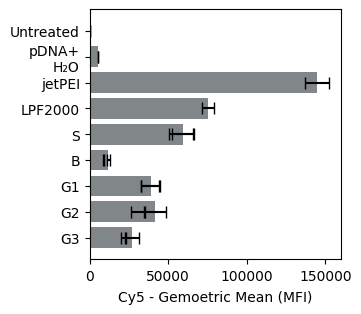

In [4]:
# plotting the CCK8 assay information
color_gray = "#818689"

plt.figure(figsize=(3.25, 3.25))
plt.barh(sample, geometric_mean, xerr=stdev, capsize = 4, color=color_gray)
plt.xlabel('Cy5 - Gemoetric Mean (MFI)', labelpad=5)

plt.show()

/Users/aryellewright/Library/Python/3.9/lib/python/site-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/Users/aryellewright/Library/Python/3.9/lib/python/site-packages/matplotlib/axes/_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


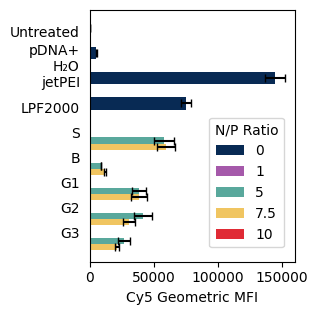

In [7]:
polymer_order = ['Untreated','pDNA+\nH₂O', 'jetPEI','LPF2000','S', 'B', 'G1', 'G2', 'G3']
df['Sample'] = pd.Categorical(df['Sample'], categories=polymer_order, ordered=True)
df_zeta_sorted = df.sort_values(by=['Sample', 'N/P ratio'])

fig, ax = plt.subplots(figsize=(3.25, 3.25))
bar_width = 0.24  
larger_bar_width = 0.5
larger_width_samples = ['pDNA+\nH₂O', 'LPF2000', 'jetPEI', 'Untreated']
unique_polymers = df_zeta_sorted['Sample'].unique()
unique_ratios = df_zeta_sorted['N/P ratio'].unique()
positions = np.arange(len(polymer_order))  

colors = {
    '0.0': '#082a54',   
    '1.0': '#a559aa',   
    '5.0': '#59a89c',   
    '7.5': '#f0c561',   
    '10.0': '#e02b35'   
}

legend_dict = {}

for j, polymer in enumerate(polymer_order):
    for i, ratio in enumerate(unique_ratios):
        polymer_data = df_zeta_sorted[(df_zeta_sorted['Sample'] == polymer) & (df_zeta_sorted['N/P ratio'] == ratio)]

        if not polymer_data.empty:
            position = positions[j] - bar_width * (len(unique_ratios) / 8 - i)
            color = colors[str(ratio)]
            bar_height = larger_bar_width if polymer in larger_width_samples else bar_width
            bar = ax.barh(position, polymer_data['Geometric Mean Avg.'].mean(), xerr=polymer_data['Stdev'].mean(), 
                          color=color, height=bar_height, capsize=3)
            
            if ratio not in legend_dict:
                legend_dict[ratio] = bar

legend_handles = []
legend_labels = []

for ratio, bar_container in legend_dict.items():
    if len(bar_container.patches) > 0:
        first_bar = bar_container.patches[0]
        legend_handles.append(first_bar)
        
        if ratio == 7.5 or ratio == '7.5':
            legend_labels.append('7.5')
        else:
            legend_labels.append(str(int(float(ratio)))) 


ax.set_yticks(positions)
ax.set_yticklabels(polymer_order)
ax.invert_yaxis() 
ax.set_xlabel('Cy5 Geometric MFI')
ax.legend(handles=legend_handles, labels=legend_labels, title='N/P Ratio', loc='upper left', bbox_to_anchor=(0.55, 0.6))
ax.tick_params(axis='y', which='both', left=False)  

plt.xlim(0)
plt.tight_layout()
plt.show()